In [1]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "PS 1_Dataset_Quality_Concrete(in).csv"
df = pd.read_csv(file_path)

display(df.head())
print(df.shape)

,Unnamed: 0,Chloride,Label,Organic_Carbon,Solids,Sulphate,Turbidity,ph
0,0,1119.324168,1,178.253002,526.051381,305.391066,1956.909586,2.019602
1,1,1036.079757,1,121.985937,751.978355,202.951022,1816.186138,5.979678
2,2,1533.371242,1,100.844370,1940.216276,158.901826,1850.391669,3.647249
3,3,530.060453,1,169.685077,1667.346846,312.075730,677.841225,5.598852
4,4,1633.186960,1,148.456935,1401.681101,204.934673,416.156446,4.234521


(10000, 8)


In [2]:
# 1. Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# 2. Display column names
print("\nColumn names in the dataset:\n", df.columns.tolist())

# 3. Determine data types of each column
print("\nData types of each column:\n", df.dtypes)

# 4. Generate descriptive statistics for numerical features
print("\nDescriptive statistics:\n", df.describe())

# 5. Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())

# 6. Percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)

# 7. Check for inconsistent data types (e.g., numbers stored as strings)
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in column '{col}':", df[col].unique())

# 8. Check for unexpected zero values in critical columns
zero_critical_columns = [col for col in ['cement', 'water', 'aggregate'] if col in df.columns]
if zero_critical_columns:
    zero_counts = (df[zero_critical_columns] == 0).sum()
    print("\nZero values per column:\n", zero_counts)
else:
    print("\nNo matching columns found for zero-value checks. Skipping this step.")

# 9. Check for negative values in numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
negative_values = (df[numeric_cols] < 0).sum()
print("\nNegative values per column:\n", negative_values)

Shape of the DataFrame: (10000, 8)

Column names in the dataset:
 ['Unnamed: 0', 'Chloride', 'Label', 'Organic_Carbon', 'Solids', 'Sulphate', 'Turbidity', 'ph']

Data types of each column:
 Unnamed: 0          int64
Chloride          float64
Label               int64
Organic_Carbon    float64
Solids            float64
Sulphate          float64
Turbidity         float64
ph                float64
dtype: object

Descriptive statistics:
          Unnamed: 0      Chloride         Label  Organic_Carbon        Solids  \
count  10000.000000  10000.000000  10000.000000    10000.000000  10000.000000   
mean    1699.500000   3209.816032      0.349000      289.310908   4706.413051   
std     1357.761983   1963.715379      0.476678      164.697936   3620.078892   
min        0.000000    500.007896      0.000000       50.002808    502.309068   
25%      624.750000   1454.537607      0.000000      142.031853   1434.354000   
50%     1333.000000   2849.755448      0.000000      265.943550   3600.77203

Number of outliers in Chloride: 0
Number of outliers in Organic_Carbon: 0
Number of outliers in Solids: 0
Number of outliers in Sulphate: 0
Number of outliers in Turbidity: 0
Number of outliers in ph: 0


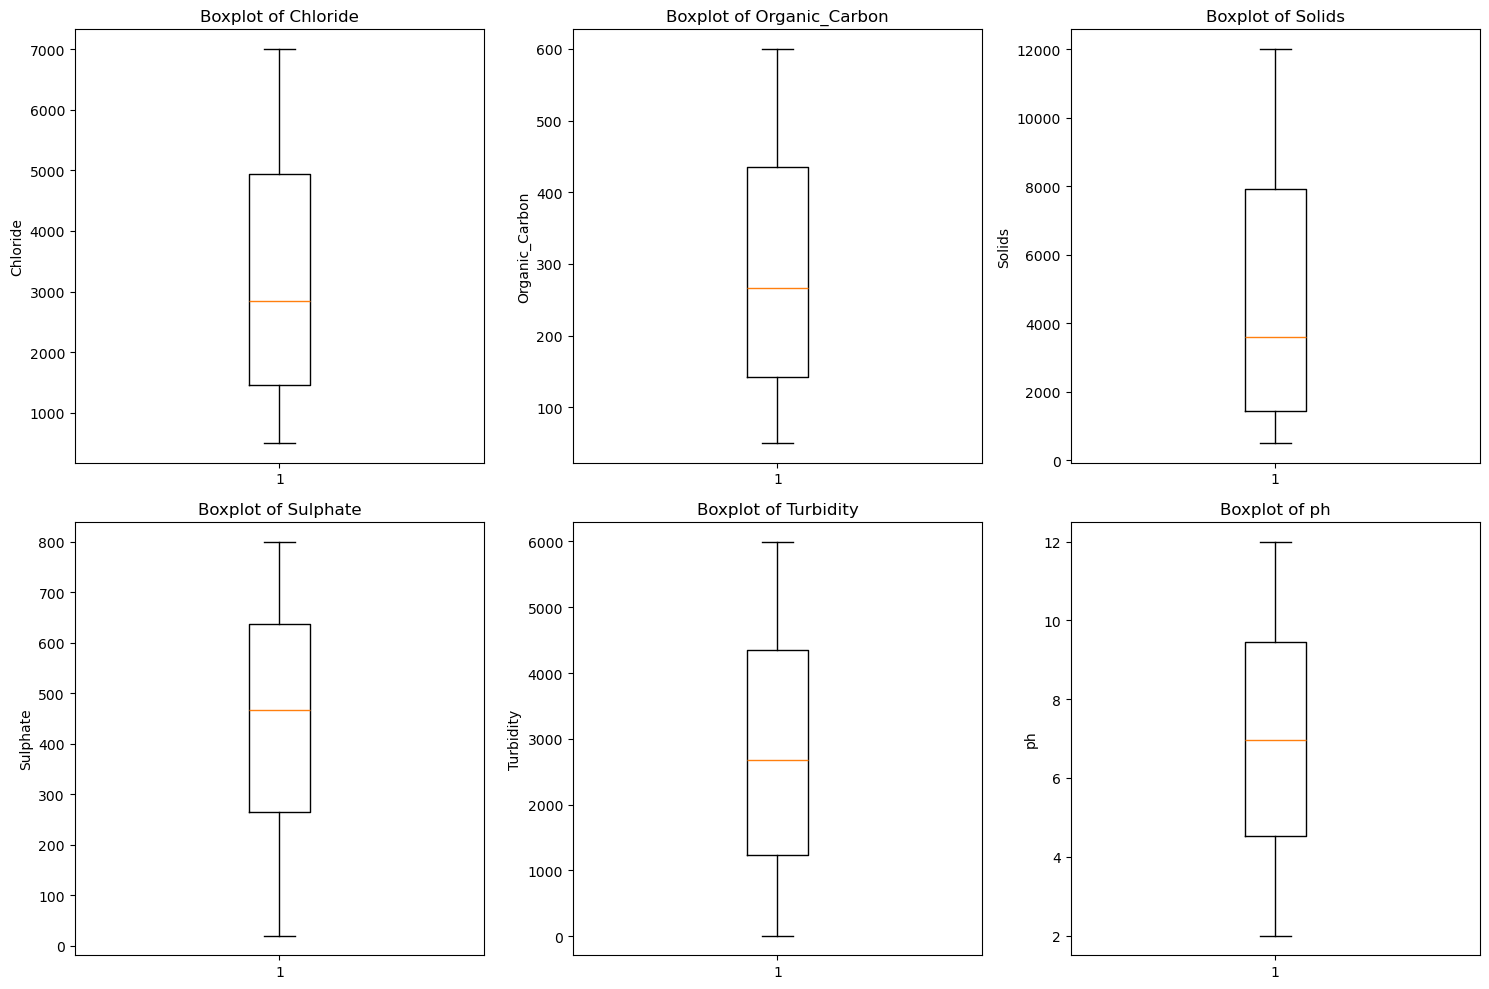


Correlation Matrix:
                 Chloride  Organic_Carbon    Solids  Sulphate  Turbidity  \
Chloride        1.000000        0.673263  0.635504  0.692490   0.685250   
Organic_Carbon  0.673263        1.000000  0.635658  0.707137   0.682548   
Solids          0.635504        0.635658  1.000000  0.665674   0.654960   
Sulphate        0.692490        0.707137  0.665674  1.000000   0.715403   
Turbidity       0.685250        0.682548  0.654960  0.715403   1.000000   
ph              0.684906        0.697304  0.659916  0.725152   0.705792   

                      ph  
Chloride        0.684906  
Organic_Carbon  0.697304  
Solids          0.659916  
Sulphate        0.725152  
Turbidity       0.705792  
ph              1.000000  


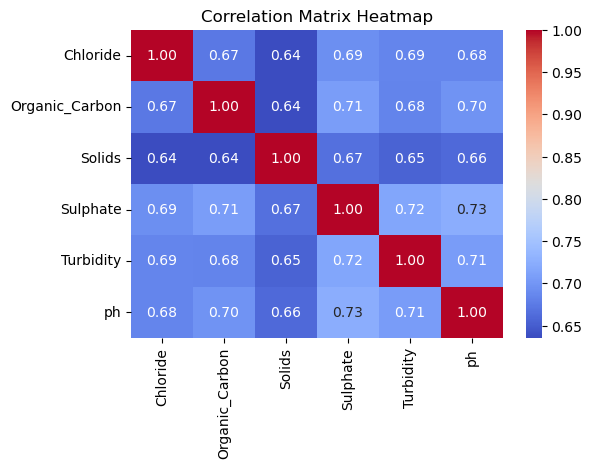

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Outlier Detection using IQR
numerical_features = ['Chloride', 'Organic_Carbon', 'Solids', 'Sulphate', 'Turbidity', 'ph']
outlier_counts = {}

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
    print(f'Number of outliers in {col}: {len(outliers)}')

    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# Correlation Analysis
correlation_matrix = df[numerical_features].corr(method='pearson')
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "PS 1_Dataset_Quality_Concrete(in).csv"
df = pd.read_csv(file_path)

# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Define features and target
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target variable

# Normalize the feature set
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Scaler saved as 'scaler.pkl'")

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



✅ Scaler saved as 'scaler.pkl'


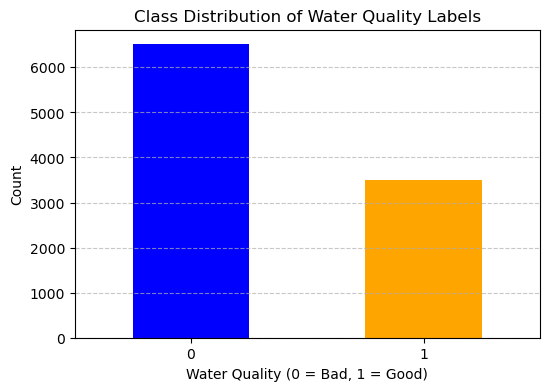

In [2]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6, 4))
df['Label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Water Quality (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.title("Class Distribution of Water Quality Labels")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



XGBoost Performance:
Accuracy: 0.8475
Precision: 0.7370
Recall (Sensitivity): 0.8754
F1-Score: 0.8003
Specificity: 0.8326


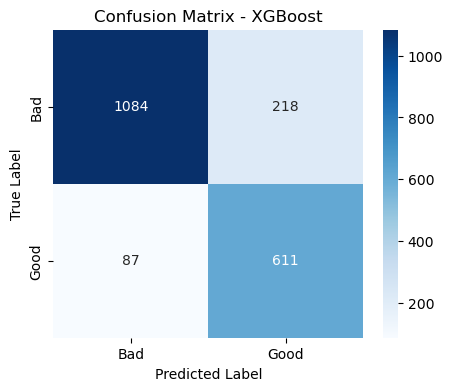


Random Forest Performance:
Accuracy: 0.7640
Precision: 0.6707
Recall (Sensitivity): 0.6361
F1-Score: 0.6529
Specificity: 0.8326


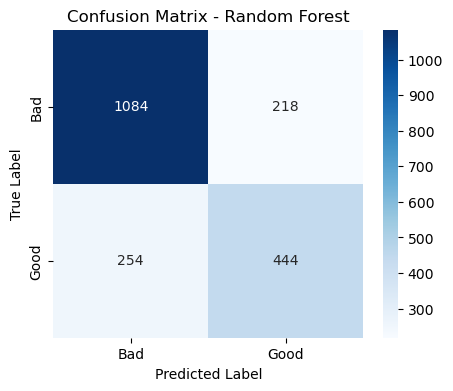


SVM Performance:
Accuracy: 0.8460
Precision: 0.7327
Recall (Sensitivity): 0.8797
F1-Score: 0.7995
Specificity: 0.8280


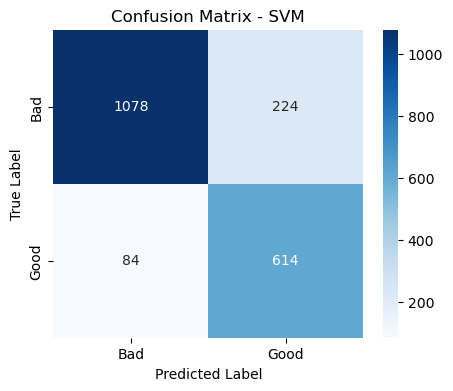

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7821 - loss: 0.5247 - val_accuracy: 0.8485 - val_loss: 0.4047
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8457 - loss: 0.4099 - val_accuracy: 0.8485 - val_loss: 0.4065
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8464 - loss: 0.4176 - val_accuracy: 0.8485 - val_loss: 0.3961
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8450 - loss: 0.4100 - val_accuracy: 0.8485 - val_loss: 0.4021
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8486 - loss: 0.4042 - val_accuracy: 0.8485 - val_loss: 0.4051
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8425 - loss: 0.4147 - val_accuracy: 0.8485 - val_loss: 0.3986
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8420 - loss: 0.4065 - val_accuracy: 0.8485 - val_loss: 0.3991
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8421 - loss: 0.4099 - val_accuracy: 0

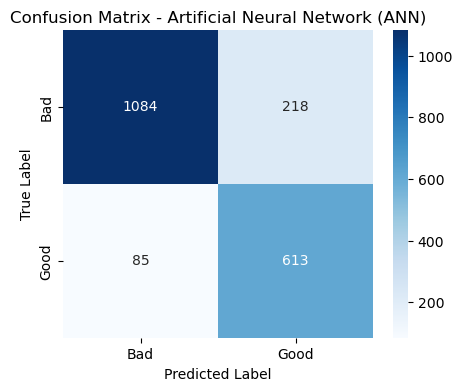

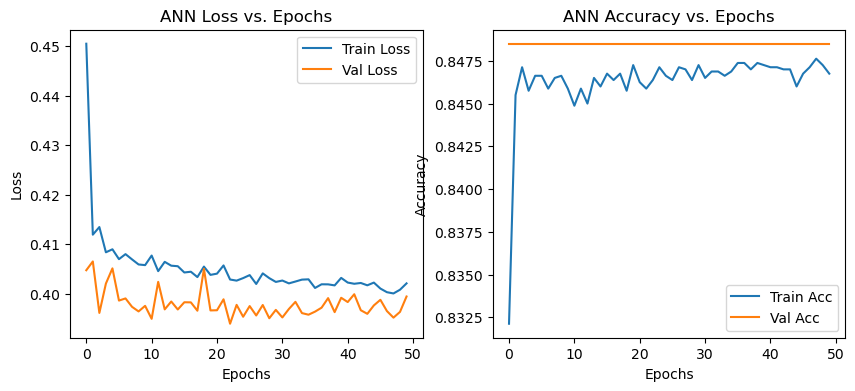

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization



# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # True Positive Rate
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # True Negative Rate

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# ---- Model 1: XGBoost ----
xgb_model = xgb.XGBClassifier(
    n_estimators=200,  # Increase trees
    learning_rate=0.01,  # Lower learning rate
    max_depth=20,  # Increase depth
    subsample=0.9,  # Increase sampling
    colsample_bytree=0.9,  # More features per tree
    gamma=0.1,  # Reduce overfitting
    reg_lambda=3,  # L2 regularization
    reg_alpha=2,  # L1 regularization
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# ---- Model 2: Random Forest ----
rf_model = RandomForestClassifier(
    n_estimators=200,  # Increase trees
    max_depth=20,  # Increase depth
    min_samples_split=4,  # Reduce min samples per split
    min_samples_leaf=1,  # Allow deeper splits
    max_features="sqrt",  # Limit feature selection per tree
    bootstrap=True,  # Use bootstrapping
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

# ---- Model 3: SVM ----
svm_model = SVC(
    C=10,  # Higher regularization
    kernel='poly',  # Try 'poly' for polynomial kernel
    gamma='auto',  # Adjust gamma for complexity
    probability=True
)

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
evaluate_model(y_test, y_pred_svm, "SVM")

# ---- Model 4: ANN with 10 Layers ----
ann_model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),  # Reduce overfitting
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # Output layer
])

ann_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["accuracy"])

# Train ANN
history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate ANN
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32").flatten()
evaluate_model(y_test, y_pred_ann, "Artificial Neural Network (ANN)")

# ---- ANN Training Visualization ----
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("ANN Loss vs. Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ANN Accuracy vs. Epochs")

plt.show()

In [7]:
# Save Scaler
joblib.dump(scaler, "scaler.pkl")

# Save Test Accuracies
metrics = {
    "XGBoost": xgb_model.score(X_test, y_test),
    "Random Forest": rf_model.score(X_test, y_test),
    "SVM": svm_model.score(X_test, y_test),
    "ANN": ann_model.evaluate(X_test, y_test, verbose=0)[1]
}
joblib.dump(metrics, "metrics.pkl")

print("✅ Models, Scaler, and Metrics saved!")


✅ Models, Scaler, and Metrics saved!


In [8]:
import joblib
import pickle

# Save XGBoost Model
joblib.dump(xgb_model, "xgb_model.pkl")

# Save Random Forest Model
joblib.dump(rf_model, "rf_model.pkl")

# Save SVM Model
joblib.dump(svm_model, "svm_model.pkl")

# Save ANN Model (Keras uses HDF5 format)
ann_model.save("ann_model.keras", include_optimizer=False)


print("✅ All models saved successfully!")


✅ All models saved successfully!


In [9]:
import joblib
import pickle
# Load models
xgb_model = joblib.load("xgb_model.pkl")
rf_model = joblib.load("rf_model.pkl")
svm_model = joblib.load("svm_model.pkl")
from tensorflow.keras.models import load_model
ann_model = load_model("ann_model.keras", compile=False)
ann_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["accuracy"])

print("✅ All models loaded successfully!")


✅ All models loaded successfully!


In [10]:
import sys
import joblib
import numpy as np
from PyQt5.QtWidgets import (
    QApplication, QWidget, QLabel, QVBoxLayout, QPushButton,
    QLineEdit, QComboBox, QMessageBox
)
from tensorflow.keras.models import load_model

# Try loading trained models
try:
    xgb_model = joblib.load("xgb_model.pkl")
    rf_model = joblib.load("rf_model.pkl")
    svm_model = joblib.load("svm_model.pkl")
    ann_model = load_model("ann_model.keras")  # Using .keras instead of .h5
    scaler = joblib.load("scaler.pkl")  # Load the scaler
    metrics = joblib.load("metrics.pkl")  # Load test accuracies
except FileNotFoundError as e:
    print(f"❌ Missing file: {e.filename}. Train models first!")
    sys.exit()

# Dictionary of models
models = {
    "XGBoost": xgb_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "ANN": ann_model
}

class WaterQualityGUI(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle("Water Quality Prediction")
        self.setGeometry(100, 100, 400, 400)

        layout = QVBoxLayout()

        # Input fields for water quality parameters
        self.inputs = []
        labels = ["Chloride", "Organic Carbon", "Solids", "Sulphate", "Turbidity", "pH"]
        for label in labels:
            layout.addWidget(QLabel(f"Enter {label}:"))
            input_field = QLineEdit()
            layout.addWidget(input_field)
            self.inputs.append(input_field)

        # Model selection dropdown
        self.model_select = QComboBox()
        self.model_select.addItems(models.keys())
        layout.addWidget(QLabel("Select Model:"))
        layout.addWidget(self.model_select)

        # Predict button
        self.predict_btn = QPushButton("Predict")
        self.predict_btn.clicked.connect(self.predict_quality)
        layout.addWidget(self.predict_btn)

        # Labels for results
        self.result_label = QLabel("")
        self.accuracy_label = QLabel("")
        layout.addWidget(self.result_label)
        layout.addWidget(self.accuracy_label)

        self.setLayout(layout)

    def predict_quality(self):
        try:
            # Read user inputs
            features = np.array([float(field.text()) for field in self.inputs]).reshape(1, -1)

            # Normalize inputs using the saved scaler
            features_scaled = scaler.transform(features)

            # Get selected model
            model_name = self.model_select.currentText()
            model = models[model_name]

            # Make prediction
            if model_name == "ANN":
                prediction = (model.predict(features_scaled) > 0.5).astype("int32").flatten()
            else:
                prediction = model.predict(features_scaled)

            result = "Good Water Quality" if prediction == 1 else "Bad Water Quality"
            test_acc = metrics.get(model_name, "N/A")  # Get stored test accuracy

            # Display results
            self.result_label.setText(f"Prediction: {result}")
            self.accuracy_label.setText(f"Test Accuracy: {test_acc:.2f}")

        except ValueError:
            QMessageBox.critical(self, "Error", "Please enter valid numerical values.")

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = WaterQualityGUI()
    window.show()
    sys.exit(app.exec_())


SystemExit: 0

C:\Users\kalya\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
